## Partie D)

Écrire un code de calcul générique (c-à-d pour un Ntot non précisé d’avance) pour résoudre l’Éq. (1) (avez S une réaction du premier ordre ou un terme source constant en fonction des spécifications du problème). Celui-ci nous servira particulièrement pour le Devoir 2.


$ C_{i = 1, ..., 3}^{t} (1 - \Delta t k) = C_{i-1}^{t+1} (\frac{- \Delta t D_{eff}}{\Delta r}) 
+ C_{i}^{t+1} (1 + \frac{2 \Delta t D_{eff}}{\Delta r^2} + \frac{\Delta t D_{eff}}{r \Delta r})
+ C_{i+1}^{t+1} (\frac{-\Delta t D_{eff}}{\Delta r^2} - \frac{\Delta t D_{eff}}{r \Delta r})$

$C_0^t (1 - \Delta t k) = C_0^{t+1} $ (condition neuman à $r=0$)

$ C_{4}^{t} = C_e $ (condition dirichlet à $r = R$)

In [2]:
%load_ext autoreload

In [19]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from Diffusion import Diffusion


In [34]:
problem = Diffusion(100)
t = 0
times = [t]
change = 100
while ~np.isclose(change, 0):
    C_vals = problem.C_values.copy()
    t = problem.step(1e9)
    times.append(t)
    change = np.sum(np.abs(C_vals - problem.C_values))

In [42]:
def analytical_solution(r):
    C = 0.25 * 1e-8/1e-10 * 0.25 * ((r/0.5)**2 - 1) + 10
    return C

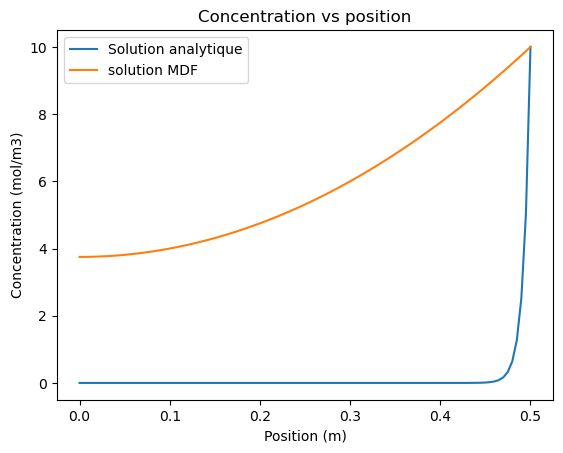

In [46]:
plt.plot(problem.R_values, problem.C_values, label='Solution analytique')
plt.plot(problem.R_values, analytical_solution(problem.R_values), label='solution MDF')

ax = plt.gca()
ax.set_title('Concentration vs position')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Concentration (mol/m3)')
ax.legend()